In [1]:
# Librairies 
from sklearn.linear_model import SGDRegressor 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## 1- Data Processing

In [2]:
dataset = pd.read_csv("autoscout24-germany-dataset.csv")
dataset.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011


In [3]:
# Drop non numerical columns
non_numerical_columns = dataset.select_dtypes(include=['object']).columns
dataset.drop(columns=non_numerical_columns, inplace=True)
dataset.head()

,mileage,price,hp,year
0,235000,6800,116.0,2011
1,92800,6877,122.0,2011
2,149300,6900,160.0,2011
3,96200,6950,110.0,2011
4,156000,6950,156.0,2011


In [4]:
# Drop all rows with missing values
dataset.dropna(inplace=True)
dataset.isna().sum()


mileage    0
price      0
hp         0
year       0
dtype: int64

## 2- Data Visualization

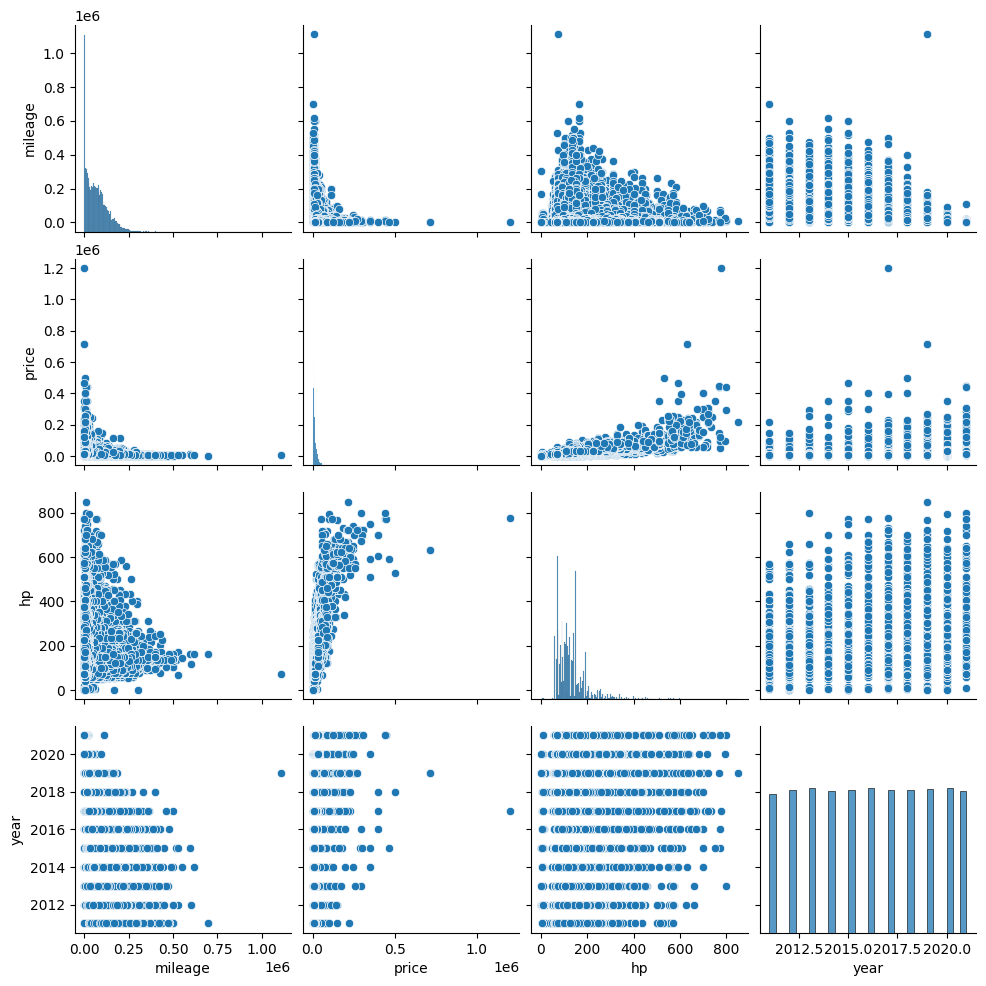

In [5]:
# Pairplot
sns.pairplot(dataset)
plt.show()

In [6]:
# Feature scaling
x_features = ["mileage", "hp", "year"]
x_train = dataset[x_features].values
y_train = dataset["price"]
# Apply z-score normalization
scaler = StandardScaler()
x_norm = scaler.fit_transform(x_train)
print(x_norm)

[[ 2.62321269 -0.22519988 -1.58885521]
 [ 0.3463755  -0.14567541 -1.58885521]
 [ 1.251026    0.3579796  -1.58885521]
 ...
 [-1.13790779 -0.82163344  1.58084484]
 [-1.13790779 -0.82163344  1.58084484]
 [-1.13790779 -0.82163344  1.58084484]]


## 3- Regression Model

In [7]:
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(x_norm, y_train)
print(f"w_norm = {sgdr.coef_}")
print(f"b_norm = {sgdr.intercept_}")

w_norm = [-3609.13383708 12644.67200468  2756.19823239]
b_norm = [16249.4917566]


Text(0.5, 0.98, 'target versus prediction using z-score normalized model')

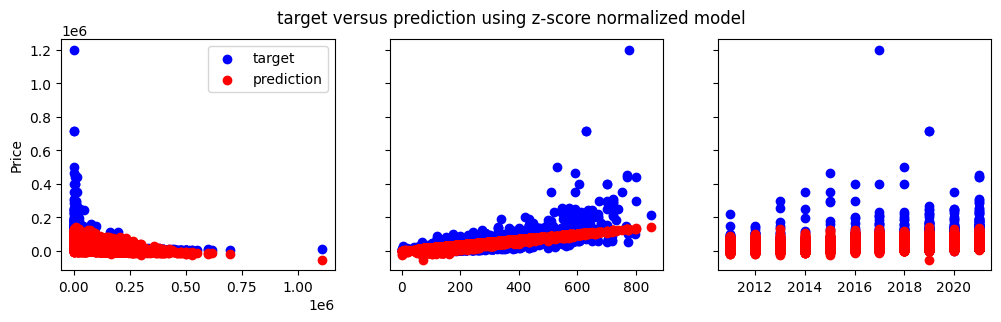

In [8]:
# Visualization
y_predict = sgdr.predict(x_norm)
fig, ax = plt.subplots(1, len(x_features), figsize=(12,3),sharey=True)

for i, feature in enumerate(x_features):
    ax[i].scatter(dataset[feature], y_train, color="blue", label="target")
    ax[i].scatter(dataset[feature], y_predict, color="red", label="prediction")
ax[0].set_ylabel("Price"); ax[0].legend()
fig.suptitle("target versus prediction using z-score normalized model")

## 4- Prediction
Let's predict the price for a car with feartures: mileage = 150000 , hp = 150.0 , year = 2024

In [9]:
x = [150000, 150.0, 2024]
x_scaled = scaler.transform([x])
y = sgdr.predict(x_scaled)
print(f"The prediction price for a car with mileage = 150000 , hp = 150.0 , year = 2024 is {y[0]:.2f}")

The prediction price for a car with mileage = 150000 , hp = 150.0 , year = 2024 is 21522.54
